In [21]:
import numpy as np
import core
import extra
import argparse
import time
import matplotlib.pyplot as plt
import KNN_using_sklearn
import KNN_optimized

#for Decision trees
import pandas as pd
import PDT
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

## KNN

## Task-1 [10]  
## Draw a graph that shows the distribution of the various labels across the entire dataset.  


## Top 20 label distribution across samples 

No. of labels =  193


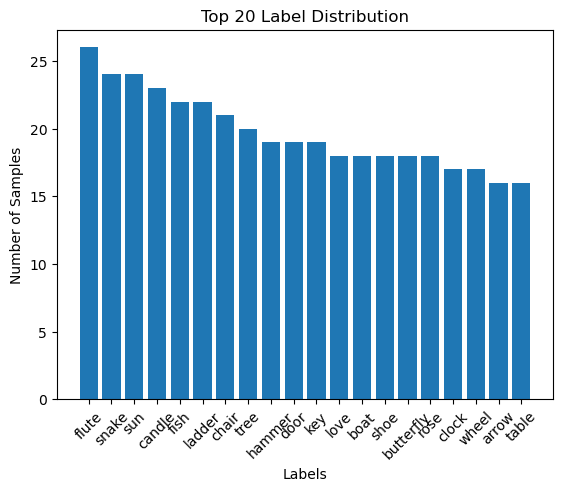

In [2]:

data = np.load("data.npy",allow_pickle=True)

labels = data[:, 3]

# Calculate label frequencies
unique_labels, label_counts = np.unique(labels, return_counts=True)
print('No. of labels = ',len(unique_labels))
#Sort labels based on counts and select the top 20
sorted_indices = np.argsort(label_counts)[::-1]     #[start:stop:jump]
top_labels = unique_labels[sorted_indices][:20]
top_counts = label_counts[sorted_indices][:20]

# Plot the bar graph for top 20 labels
plt.bar(top_labels, top_counts)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Top 20 Label Distribution')
plt.xticks(rotation=45)
plt.show()

## Bottom 20 label distribution across samples 

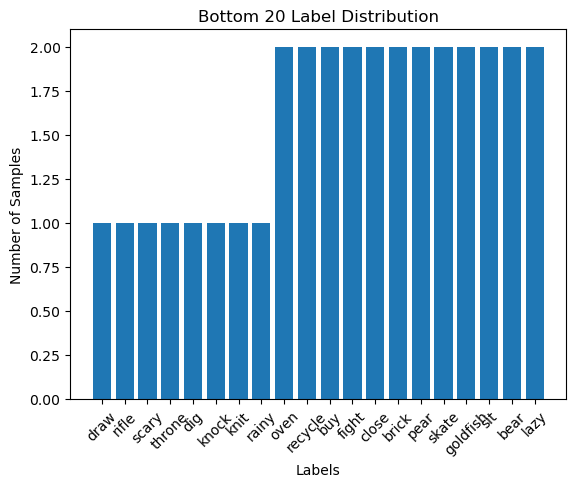

In [3]:
sorted_indices = np.argsort(label_counts)[::1]
bottom_labels = unique_labels[sorted_indices][:20]
bottom_counts = label_counts[sorted_indices][:20]

# Plot the bar graph for top 20 labels
plt.bar(bottom_labels, bottom_counts)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Bottom 20 Label Distribution')
plt.xticks(rotation=45)
plt.show()

## TASK-1 [30]

-core.py file contain the class for KNN   
-extra.py file contain other required function for operations  
-Macking the list(hy_param) of diffrent combination for given hyperparameters list(h_param)  
-This function take set of hyperparameters dictionary as input and give the f-1 scoure, accuracy, precision, 
recall as output for all combinations


In [4]:



def KNN_Run(h_param, test_split_ratio=0.2):
    hy_param = extra.hyper_param(h_param)
    f_1_score = []
    accuracy = []
    precision = []
    recall = []
 
    # output = []

    dataset = np.load("data.npy",allow_pickle=True)

    
    for i in hy_param:

        my_knn = core.KNN(i)
        encoder = i[1]
        if encoder == 'RESNET':
            X_train = dataset[:,1]  # Load the Data
            X_train = np.concatenate([item.flatten() for item in X_train]).reshape(1500, 1024)     #for RESNETs 1st column
            
        elif encoder == 'VIT':
            X_train = dataset[:,2]  # Load the Data
            X_train = np.concatenate([item.flatten() for item in X_train]).reshape(1500, 512)      #for VITs 2nd column
            
'''flatten-convert nD array to 1D array, concatenate-work like flatten for list, convert list to 1D array '''
        
        y_train = dataset[:,3]
        X_train, X_test, y_train, y_test = extra.train_test_split(X_train, y_train, test_size=test_split_ratio, random_state=42)

        my_knn.fit(X_train, y_train)
        predictions = my_knn.predict(X_test)

        f_1_score_t, accuracy_t, precision_t, recall_t = extra.output_of_knn(predictions, y_test)
        f_1_score.append(f_1_score_t)
        accuracy.append(accuracy_t)
        precision.append(precision_t)
        recall.append(recall_t)
        # l_temp = (f_1_score, accuracy, precision, recall)
        # output.append(l_temp)
        #accuracy = extra.accuracy(predictions, y_test)
    return f_1_score, accuracy, precision, recall, len(hy_param)





# Task-2 [30]

## Best (k, encoder, distance metric) triplet that gives the best validation accuracy.  

In [5]:
h1_param = {
        'k_list' : [1,2,3,4,5,6],
        'encoder_list' : ['RESNET', 'VIT'],
        'distance_matrix_list' : ['Euclidean', 'Manhattan']
        }
hy_param = extra.hyper_param(h1_param)
f_1_score, accuracy, precision, recall, len_hy = KNN_Run(h1_param)

max_accu = accuracy.index(max(accuracy))
print("Maximum accuracy = ", max(accuracy), "for hyperparameters (K, encoder, distance_matrix) =",hy_param[max_accu])



Maximum accuracy =  0.2866666666666667 for hyperparameters (K, encoder, distance_matrix) = (4, 'VIT', 'Euclidean')


## Ordered rank list of top 20 triplets.  

In [6]:
#2
top_20_results = sorted(enumerate(accuracy), key=lambda x: x[1], reverse=True)[:20]    
for r in top_20_results:
    print ('Hyperparameters =',hy_param[r[0]],'..... Accuracy =', r[1])
'''top_20_results is dictionary of accuracy and index of accuracy in decening order of accuracy '''

Hyperparameters = (4, 'VIT', 'Euclidean') ..... Accuracy = 0.2866666666666667
Hyperparameters = (3, 'VIT', 'Euclidean') ..... Accuracy = 0.2833333333333333
Hyperparameters = (6, 'VIT', 'Manhattan') ..... Accuracy = 0.2833333333333333
Hyperparameters = (6, 'VIT', 'Euclidean') ..... Accuracy = 0.2733333333333333
Hyperparameters = (3, 'VIT', 'Manhattan') ..... Accuracy = 0.27
Hyperparameters = (1, 'VIT', 'Euclidean') ..... Accuracy = 0.2633333333333333
Hyperparameters = (2, 'VIT', 'Euclidean') ..... Accuracy = 0.2633333333333333
Hyperparameters = (5, 'VIT', 'Euclidean') ..... Accuracy = 0.2633333333333333
Hyperparameters = (5, 'VIT', 'Manhattan') ..... Accuracy = 0.2633333333333333
Hyperparameters = (1, 'VIT', 'Manhattan') ..... Accuracy = 0.26
Hyperparameters = (2, 'VIT', 'Manhattan') ..... Accuracy = 0.26
Hyperparameters = (4, 'VIT', 'Manhattan') ..... Accuracy = 0.26
Hyperparameters = (5, 'RESNET', 'Manhattan') ..... Accuracy = 0.21333333333333335
Hyperparameters = (6, 'RESNET', 'Manha

## Plot k vs accuracy 

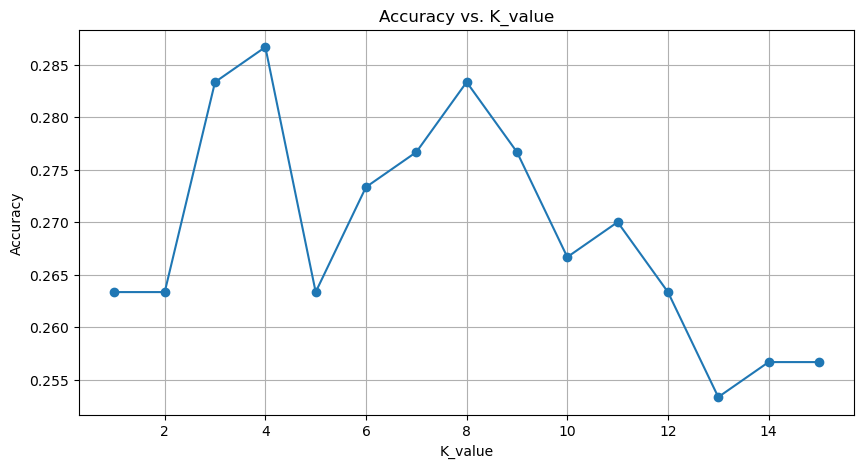

In [7]:
#3
h2_param = {
        'k_list' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],               
        'encoder_list' : ['VIT'],
        'distance_matrix_list' : ['Euclidean']
        }
f_1_score, accuracy, precision, recall,len_hy2 = KNN_Run(h2_param)
#count_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
k_values = [i for i in range(1, len(accuracy) + 1)]

plt.figure(figsize=(10, 5))

plt.plot(k_values, accuracy, marker='o')

# Add labels and title
plt.xlabel('K_value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K_value')

# Display the plot
plt.grid(True)
plt.show()


# Tasks [30]  

## Model optimization using vectorization method

Plot of inference time vs KNN models



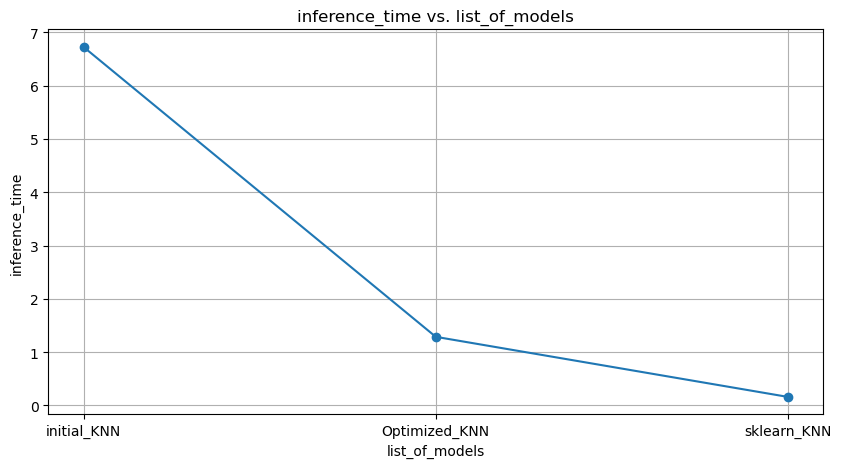

In [9]:
#2
#The default test data split is 20%

h3_param = {
        'k_list' : [9],               #,4,5,6,7,8,9,10,11,12,13,14,15
        'encoder_list' : ['VIT'],
        'distance_matrix_list' : ['Euclidean']
        }
#initial model of KNN
start_time= time.time() # set the time at which inference started
KNN_Run(h3_param)

stop_time=time.time()
duration_init_knn =stop_time - start_time


#Optimized using vectorigation model of KNN
start_time= time.time() # set the time at which inference started
KNN_optimized.KNN_Run_opt(h3_param)

stop_time=time.time()
duration_opt_knn =stop_time - start_time

#sklearn model of KNN
start_time= time.time() 
a=KNN_using_sklearn.KNN_sklearn(h3_param)
stop_time=time.time()
duration_sklearn =stop_time - start_time

#Ploting
list_of_models = ['initial_KNN','Optimized_KNN', 'sklearn_KNN']
inference_time = [duration_init_knn, duration_opt_knn, duration_sklearn]

plt.figure(figsize=(10, 5))

plt.plot(list_of_models, inference_time, marker='o')

# Add labels and title
plt.xlabel('list_of_models')
plt.ylabel('inference_time')
plt.title('inference_time vs. list_of_models')

# Display the plot
plt.grid(True)
print('Plot of inference time vs KNN models\n')
plt.show()

## plot of inference time vs train dataset size for KNN models

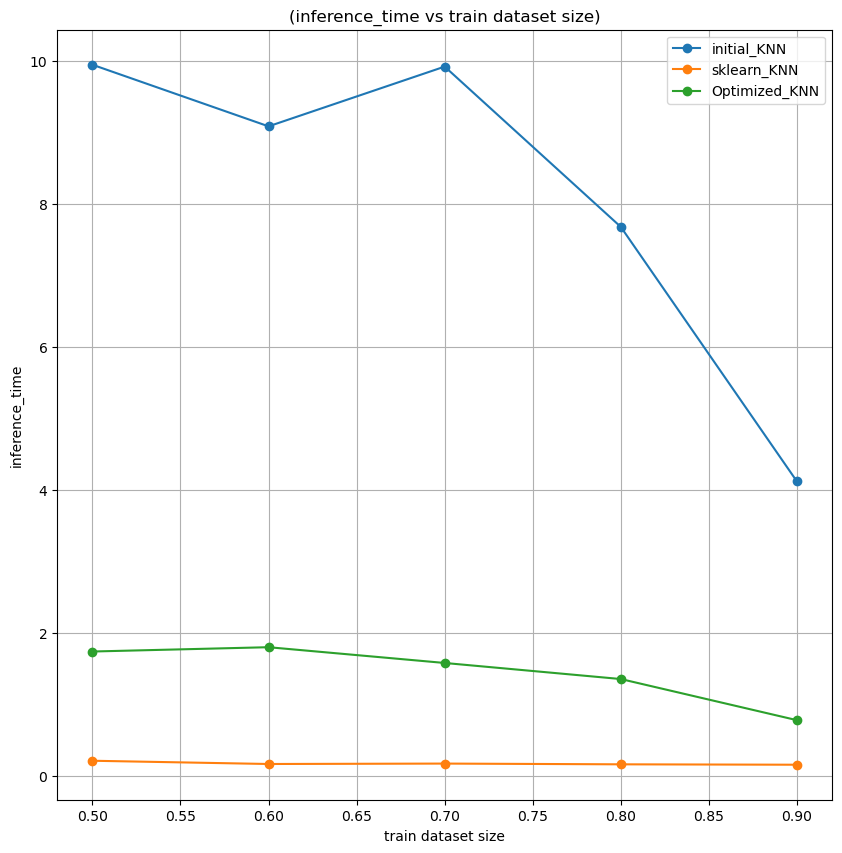

In [10]:
#3
'''inference time vs train dataset size for initial KNN model, best
KNN model, most optimized KNN model, and the default sklearn KNN
model.'''
h4_param = {
        'k_list' : [1],        
        'encoder_list' : ['VIT'],
        'distance_matrix_list' : ['Euclidean']
        }

data_split = [0.5,0.6,0.7,0.8,0.9]
duration_init_knn = []
for j in data_split:
        start_time= time.time() # set the time at which inference started
        KNN_Run(h4_param,1-j)

        stop_time=time.time()
        duration_init_knn.append(stop_time - start_time) 

duration_sklearn_knn = []
for j in data_split:
        start_time= time.time() # set the time at which inference started
        KNN_using_sklearn.KNN_sklearn(h4_param,1-j)
        stop_time=time.time()
        duration_sklearn_knn.append(stop_time - start_time) 
        
duration_opt_knn = []
for j in data_split:
        start_time= time.time() # set the time at which inference started
        KNN_optimized.KNN_Run_opt(h4_param,1-j)
        stop_time=time.time()
        duration_opt_knn.append(stop_time - start_time) 
        
plt.figure(figsize=(10, 10))

plt.plot(data_split, duration_init_knn, marker='o',label = 'initial_KNN')
plt.plot(data_split, duration_sklearn_knn, marker='o',label = 'sklearn_KNN')
plt.plot(data_split, duration_opt_knn, marker='o',label = 'Optimized_KNN')

# Add labels and title
plt.xlabel('train dataset size')
plt.ylabel('inference_time')
plt.title('(inference_time vs train dataset size)')
plt.legend()
# Display the plot
plt.grid(True)
plt.show()

# Decision Trees

Read the CSV file and print the columns present in the data

In [11]:
data_read = pd.read_csv('advertisement.csv')
data_read.columns

Index(['age', 'gender', 'income', 'education', 'married', 'children', 'city',
       'occupation', 'purchase_amount', 'most bought item', 'labels'],
      dtype='object')

## List of labels present in the data

In [13]:
# print(data_read.head(10))
#print(data_read.describe())

#list of label present in the data
Y = data_read["labels"]
column_matrix = np.array(Y)

result = [(entry.split()) for entry in column_matrix]

# print(result)
unique_labels = set(label for sublist in result for label in sublist)
unique_labels_list = list(unique_labels)
print("Labels=",unique_labels_list)


Labels= ['books', 'furniture', 'sports', 'food', 'home', 'beauty', 'clothing', 'electronics']


## Bar chart of the data set distributed across the labels

## Bar chart Top 30 labels 

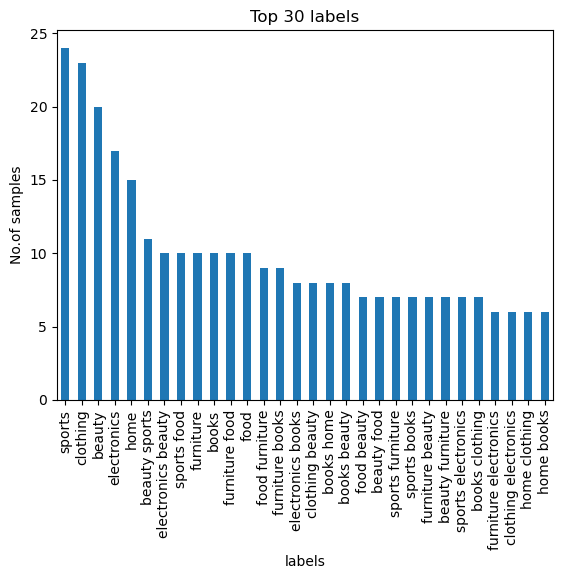

In [15]:
label_counts = data_read['labels'].value_counts()
top_label = label_counts.head(30)

top_label.plot(kind='bar')

# plt.bar(label_counts.index, label_counts.value)
plt.xlabel('labels')
plt.ylabel('No.of samples')
plt.title('Top 30 labels')
plt.show()

## Bar chart bottom 30 labels 

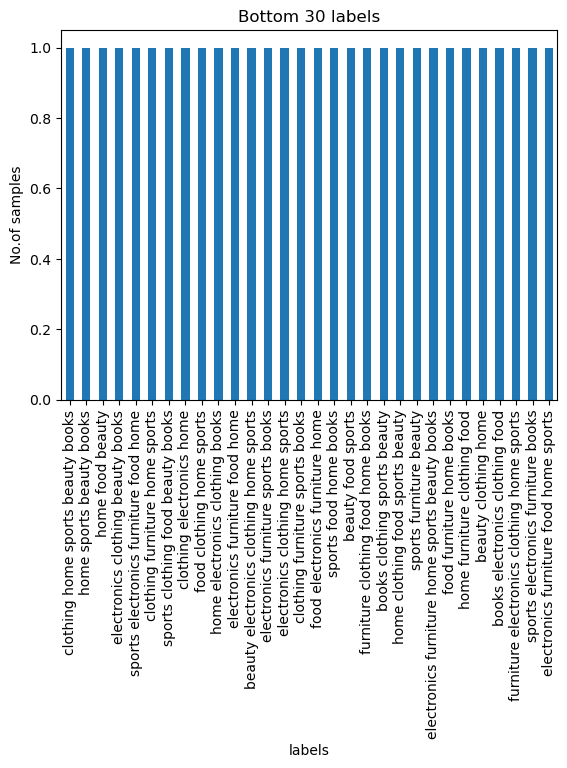

In [16]:
bottom_labels = label_counts.tail(30)
bottom_labels.plot(kind='bar')
plt.xlabel('labels')
plt.ylabel('No.of samples')
plt.title('Bottom 30 labels')
plt.show()

## Decision tree function 

In [22]:
def my_decision_tree(encoded_data, encoded_labels, h1_param):

    X_train, X_test, Y_train, Y_test = train_test_split(encoded_data, encoded_labels, test_size=0.2,
    shuffle=True, random_state=10)

    
    hy_param = extra.hyper_param(h1_param)
    f1 = []
    f1_2 = []
    accuracy = []
    precision = []
    precision_2 = []
    cm = []
    recall = []
    recall_2 = []
    
    for i in hy_param:
        
        model = tree.DecisionTreeClassifier(max_depth=i[0], max_features=i[1],criterion=i[2])
        model = model.fit(X_train, Y_train)
        
        predicted_value = model.predict(X_test)

        accuracy_t= accuracy_score(Y_test, predicted_value)
        f1_t = f1_score(Y_test, predicted_value, average='micro')
        f1_t2 = f1_score(Y_test, predicted_value, average='macro')
        cm_t = confusion_matrix(Y_test.ravel(), predicted_value.ravel())
        precision_t = precision_score(Y_test, predicted_value, average='micro', zero_division=1)
        precision_t2 = precision_score(Y_test, predicted_value, average='macro', zero_division=1)
        recall_t = recall_score(Y_test, predicted_value, average='micro', zero_division=1)
        recall_t2 = recall_score(Y_test, predicted_value, average='macro', zero_division=1)

        f1.append(f1_t)
        f1_2.append(f1_t2)
        accuracy.append(accuracy_t)
        precision.append(precision_t)
        precision_2.append(precision_t2)
        recall.append(recall_t)
        recall_2.append(recall_t2)
        cm.append(cm_t)

    return f1, f1_2, accuracy, precision,precision_2, recall, recall_2, cm, Y_test, predicted_value

# Powerset  
## (The Metrics (Accuracy, F1(micro and macro) , Confusion Matrix, Precision , Recall) for all triplet of hyperparamters)

      hyperparameters  f1_micro  f1_macro  accuracy  precision_micro  \
0        (3, 3, gini)     0.030  0.005642     0.030            0.030   
1     (3, 3, entropy)     0.045  0.003468     0.045            0.045   
2        (3, 5, gini)     0.045  0.007028     0.045            0.045   
3     (3, 5, entropy)     0.015  0.001535     0.015            0.015   
4        (3, 7, gini)     0.030  0.004911     0.030            0.030   
5     (3, 7, entropy)     0.055  0.005273     0.055            0.055   
6        (3, 9, gini)     0.025  0.001365     0.025            0.025   
7     (3, 9, entropy)     0.070  0.007003     0.070            0.070   
8       (3, 11, gini)     0.055  0.004086     0.055            0.055   
9    (3, 11, entropy)     0.070  0.007003     0.070            0.070   
10       (5, 3, gini)     0.035  0.003496     0.035            0.035   
11    (5, 3, entropy)     0.015  0.002516     0.015            0.015   
12       (5, 5, gini)     0.040  0.004743     0.040            0

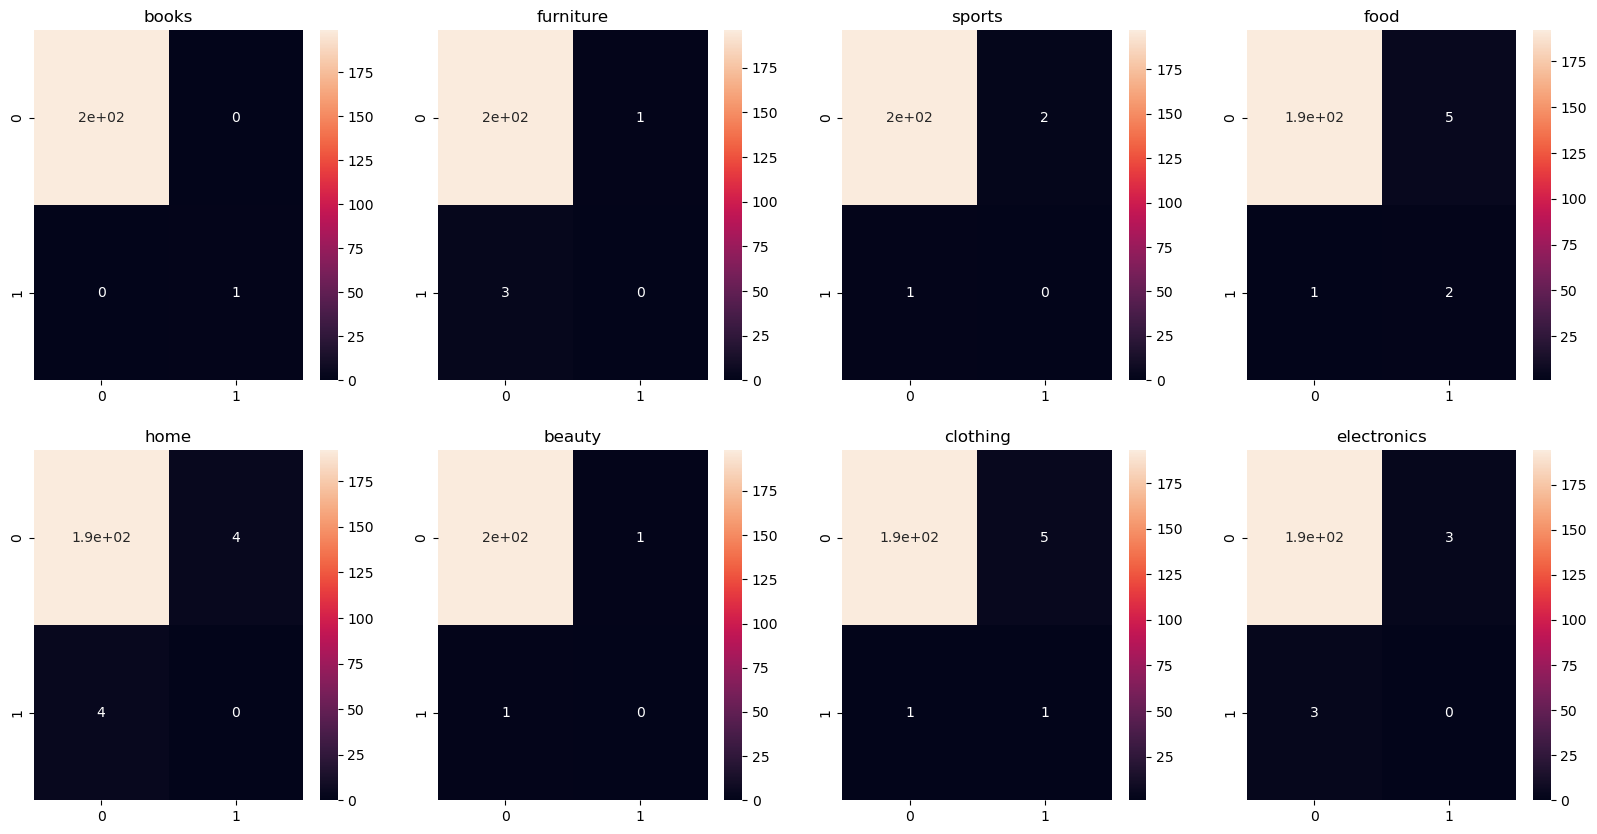

In [42]:
#encoding of labels based on powerset
label = unique_labels_list
power_set = PDT.generate_power_set(label)

Y = data_read["labels"]
column_matrix = np.array(Y)
result = [set(entry.split()) for entry in column_matrix]
encoded_labels = np.array(result)
result = [set(entry) for entry in power_set]
power_set = np.array(result)
# print(encoded_labels,power_set)
z = PDT.one_hot_enco(encoded_labels,power_set)
encoded_labels_p = np.array(z)

#simple encoding
X = data_read.drop("labels",axis = 1)
df = pd.DataFrame(X)
categorical_columns = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']

label_encoders = {}
encoded_data = df.copy()

for col_index in categorical_columns:
    le = LabelEncoder()
    encoded_column = le.fit_transform(df[col_index])
    encoded_data[col_index] = encoded_column
    label_encoders[col_index] = le

h1_param = {
        'Max_depth' : [3,5,10,20,30],
        'Max_features' : [3,5,7,9,11],
        'criterion' : ['gini', 'entropy']
        }

hy_param = extra.hyper_param(h1_param)
f1_micro, f1_macro, accuracy, precision_micro, precision_macro, recall_micro, recall_macro, cm, Y_test, predicted_value = my_decision_tree(encoded_data, encoded_labels_p, h1_param)

data = {'hyperparameters': hy_param, 'f1_micro': f1_micro, 'f1_macro': f1_macro, 'accuracy': accuracy,
 'precision_micro': precision_micro,'precision_macro':precision_macro, 'recall_micro': recall_micro, 'recall_macro': recall_macro}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
cms = multilabel_confusion_matrix(Y_test, predicted_value)
for i in range(4):
    sns.heatmap(cms[i], ax=axes[0][i], xticklabels=True, yticklabels=True,  annot=True)
    axes[0][i].set_title(label[i])
    sns.heatmap(cms[i+4], ax=axes[1][i], xticklabels=True, yticklabels=True,  annot=True)
    axes[1][i].set_title(label[i+4])

df = pd.DataFrame(data)
print(df)
print("\nConfusion matrix for hyperparameters = (30,11,'entropy') for powerset(only 8 feature is shown out off 256).")

## TOP-3 hyperparameters combination based on F1 score for powerset

In [43]:
top_3_results = sorted(enumerate(f1_micro), key=lambda x: x[1], reverse=True)[:3]
print("Top_3_hyperparameters based on f1 micro score for powerset:")
for r in top_3_results:
    print ('Hyperparameters =',hy_param[r[0]],'  f1 score =', r[1])

top_3_results = sorted(enumerate(f1_macro), key=lambda x: x[1], reverse=True)[:3]
print("\nTop_3_hyperparameters based on f1 macro score for powerset:")
for r in top_3_results:
    print ('Hyperparameters =',hy_param[r[0]],'  f1 score =', r[1])

Top_3_hyperparameters based on f1 micro score for powerset:
Hyperparameters = (5, 9, 'gini')   f1 score = 0.09
Hyperparameters = (5, 11, 'gini')   f1 score = 0.09
Hyperparameters = (5, 11, 'entropy')   f1 score = 0.085

Top_3_hyperparameters based on f1 macro score for powerset:
Hyperparameters = (20, 5, 'gini')   f1 score = 0.024808524808524808
Hyperparameters = (30, 11, 'entropy')   f1 score = 0.020970491104719297
Hyperparameters = (5, 11, 'entropy')   f1 score = 0.019597746658762027


## K-fold for powerset

In [44]:

classifier = tree.DecisionTreeClassifier(max_depth=5, max_features=11,criterion='gini')
num_folds = 5

scoring = {
    'Accuracy': 'accuracy',
    'F1 Macro': make_scorer(f1_score, average='macro', zero_division=1), 
    'F1 Micro': make_scorer(f1_score, average='micro', zero_division=1),  
    'Precision Macro': make_scorer(precision_score, average='macro', zero_division=1), 
    'Precision Micro': make_scorer(precision_score, average='micro', zero_division=1),  
    'Recall Macro': make_scorer(recall_score, average='macro', zero_division=1), 
    'Recall Micro': make_scorer(recall_score, average='micro', zero_division=1)  
}

results = cross_validate(classifier, encoded_data, encoded_labels_p, cv=num_folds, scoring=scoring)

list_kfold = []
list1 = []
list2 = []
list1.append('Mean Score')
list2.append('Standard Deviation')

for metric_name, scores in results.items():
    mean_score = scores.mean()
    std_score = scores.std()
    list1.append(mean_score)
    list2.append(std_score)
list_kfold.append(list1)
list_kfold.append(list2)
results = pd.DataFrame(list_kfold, columns=['', 'fit_time ', 'score_time ','test_Accuracy ','test_F1 Macro','test_F1 Micro','test_Precision Macro','test_Precision Micro','test_Recall Macro','test_Recall Micro'])
print("K-fold results")
print(results.T)   

K-fold results
                               0                   1
                      Mean Score  Standard Deviation
fit_time                0.013332            0.003178
score_time              0.023067            0.002453
test_Accuracy              0.069            0.017146
test_F1 Macro           0.079094            0.010465
test_F1 Micro              0.069            0.017146
test_Precision Macro    0.872705            0.010253
test_Precision Micro       0.069            0.017146
test_Recall Macro        0.03568             0.01404
test_Recall Micro          0.069            0.017146


c:\Users\JANAKSINH\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


# Multioutput classification  
## (Metrics (Accuracy, F1(micro and macro) , Confusion Matrix, Precision , Recall) for all triplet of hyperparamters)

      hyperparameters  f1_micro  f1_macro  accuracy  precision_micro  \
0        (3, 3, gini)  0.078231  0.068777     0.010         0.741935   
1     (3, 3, entropy)  0.068493  0.058245     0.005         0.740741   
2        (3, 5, gini)  0.052448  0.043605     0.005         1.000000   
3     (3, 5, entropy)  0.091525  0.077313     0.005         0.818182   
4        (3, 7, gini)  0.179200  0.124313     0.025         0.823529   
5     (3, 7, entropy)  0.055846  0.046810     0.005         1.000000   
6        (3, 9, gini)  0.179200  0.124313     0.025         0.823529   
7     (3, 9, entropy)  0.260870  0.208880     0.030         0.596154   
8       (3, 11, gini)  0.260870  0.208880     0.030         0.596154   
9    (3, 11, entropy)  0.260870  0.208880     0.030         0.596154   
10       (5, 3, gini)  0.090301  0.081813     0.010         0.658537   
11    (5, 3, entropy)  0.010619  0.010646     0.000         0.375000   
12       (5, 5, gini)  0.287599  0.260181     0.040         0.54

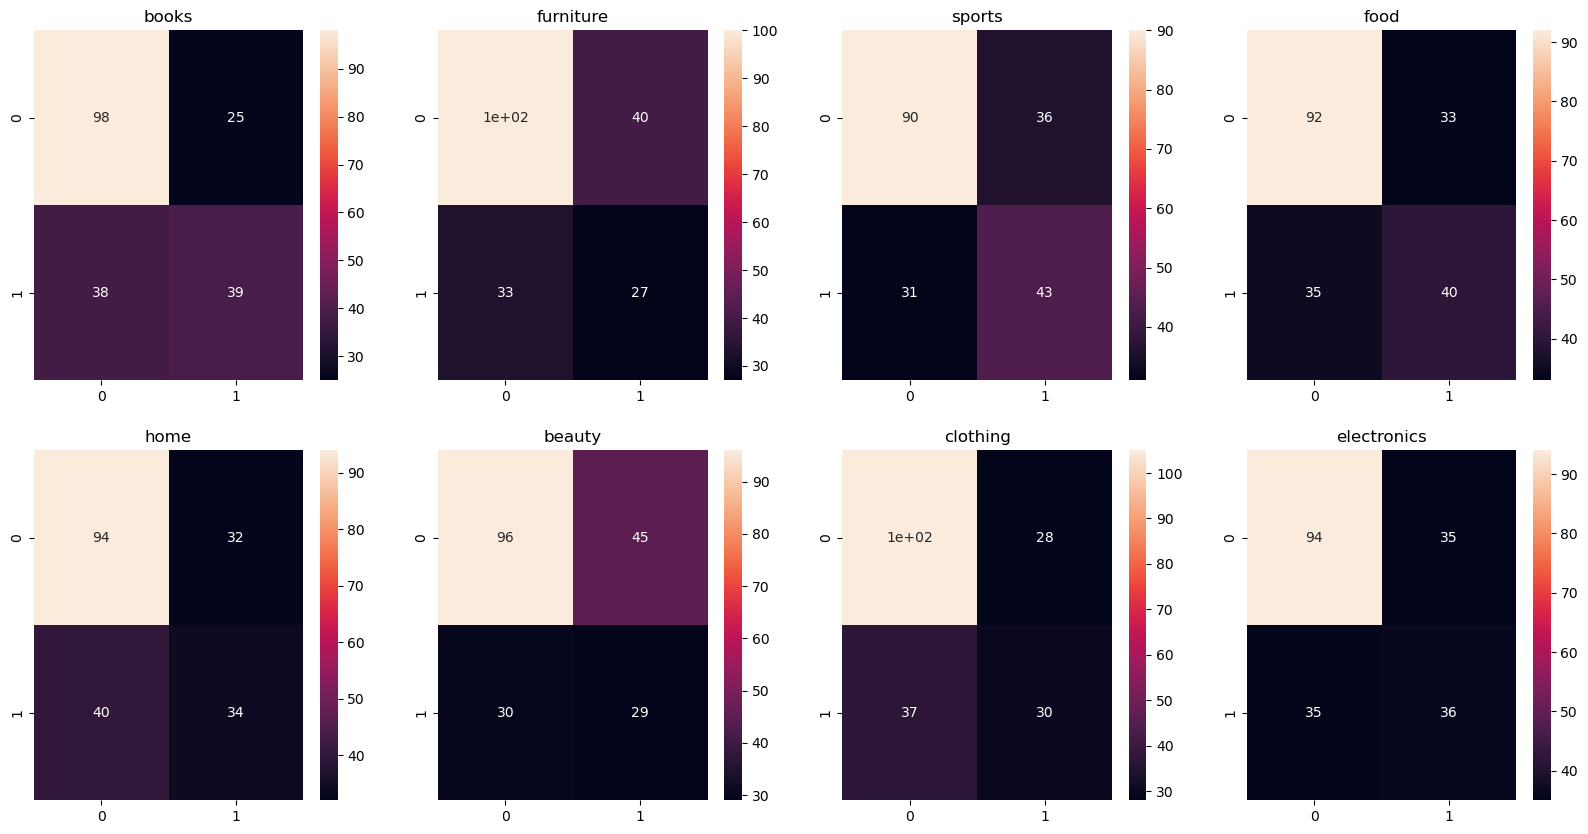

In [45]:
#Multioutput encoding for labels of dataset
Y = data_read["labels"]
column_matrix = np.array(Y)
result = [(entry.split()) for entry in column_matrix]

mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(result)

#simple encoding
X = data_read.drop("labels",axis = 1)
df = pd.DataFrame(X)
categorical_columns = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']

label_encoders = {}
encoded_data = df.copy()

for col_index in categorical_columns:
    le = LabelEncoder()
    encoded_column = le.fit_transform(df[col_index])
    encoded_data[col_index] = encoded_column
    label_encoders[col_index] = le

#dictionary of hyperparameters
h1_param = {
            'Max_depth' : [3,5,10,20,30],
            'Max_features' : [3,5,7,9,11],
            'criterion' : ['gini', 'entropy']
            }
hy_param = extra.hyper_param(h1_param)
f1_micro, f1_macro, accuracy, precision_micro, precision_macro, recall_micro, recall_macro, cm,Y_test, predicted_value= my_decision_tree(encoded_data, encoded_labels, h1_param)

data = {'hyperparameters': hy_param, 'f1_micro': f1_micro, 'f1_macro': f1_macro, 'accuracy': accuracy,
 'precision_micro': precision_micro,'precision_macro':precision_macro, 'recall_micro': recall_micro, 'recall_macro': recall_macro}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
cms = multilabel_confusion_matrix(Y_test, predicted_value)
for i in range(4):
    sns.heatmap(cms[i], ax=axes[0][i], xticklabels=True, yticklabels=True,  annot=True)
    axes[0][i].set_title(label[i])
    sns.heatmap(cms[i+4], ax=axes[1][i], xticklabels=True, yticklabels=True,  annot=True)
    axes[1][i].set_title(label[i+4])

df = pd.DataFrame(data)
print(df)
print("\nConfusion matrix for hyperparameters = (30,11,'entropy') for Multioutput.")

## Top three results based on f1-score for multioutput  

In [47]:
top_3_results = sorted(enumerate(f1_micro), key=lambda x: x[1], reverse=True)[:3]
print("Top_3_hyperparameters based on f1 micro score for Multioutput:")
for r in top_3_results:
    print ('Hyperparameters =',hy_param[r[0]],'  f1 score =', r[1])

top_3_results = sorted(enumerate(f1_macro), key=lambda x: x[1], reverse=True)[:3]
print("\nTop_3_hyperparameters based on f1 macro score for Multioutput:")
for r in top_3_results:
    print ('Hyperparameters =',hy_param[r[0]],'  f1 score =', r[1])

Top_3_hyperparameters based on f1 micro score for Multioutput:
Hyperparameters = (30, 9, 'gini')   f1 score = 0.5316681534344336
Hyperparameters = (20, 11, 'gini')   f1 score = 0.5238095238095237
Hyperparameters = (10, 11, 'entropy')   f1 score = 0.5203761755485894

Top_3_hyperparameters based on f1 macro score for Multioutput:
Hyperparameters = (30, 9, 'gini')   f1 score = 0.5296230938932802
Hyperparameters = (20, 11, 'gini')   f1 score = 0.5203698015077125
Hyperparameters = (10, 11, 'entropy')   f1 score = 0.5184150916957109


## K-fold for multioutput

In [49]:
# Create a Decision Tree classifier
classifier = tree.DecisionTreeClassifier(max_depth=5, max_features=11,criterion='gini')

# Define the number of folds for cross-validation
num_folds = 5

# Define the list of metrics to evaluate
scoring = {
    'Accuracy': 'accuracy',
    'F1 Macro': make_scorer(f1_score, average='macro', zero_division=1), 
    'F1 Micro': make_scorer(f1_score, average='micro', zero_division=1),  
    'Precision Macro': make_scorer(precision_score, average='macro', zero_division=1), 
    'Precision Micro': make_scorer(precision_score, average='micro', zero_division=1),  
    'Recall Macro': make_scorer(recall_score, average='macro', zero_division=1), 
    'Recall Micro': make_scorer(recall_score, average='micro', zero_division=1)  
}

# Perform K-fold cross-validation using cross_validate
results = cross_validate(classifier, encoded_data, encoded_labels, cv=num_folds, scoring=scoring)

list_kfold = []
list1 = []
list2 = []
list1.append('Mean Score')
list2.append('Standard Deviation')

# Print the results for each metric
for metric_name, scores in results.items():
    mean_score = scores.mean()
    std_score = scores.std()
    # print(mean_score)
    list1.append(mean_score)
    list2.append(std_score)
    # print(f"{metric_name} - Mean Score: {mean_score:.4f}")
    # print(f"{metric_name} - Standard Deviation: {std_score:.4f}\n")
list_kfold.append(list1)
list_kfold.append(list2)
results = pd.DataFrame(list_kfold, columns=['', 'fit_time ', 'score_time ','test_Accuracy ','test_F1 Macro','test_F1 Micro','test_Precision Macro','test_Precision Micro','test_Recall Macro','test_Recall Micro'])
print("K-fold for the multioutput")
print(results.T)   

K-fold for the multioutput
                               0                   1
                      Mean Score  Standard Deviation
fit_time                 0.01247            0.004351
score_time              0.027208            0.003921
test_Accuracy              0.078            0.018601
test_F1 Macro            0.41871             0.02229
test_F1 Micro           0.433304            0.019731
test_Precision Macro    0.772001            0.068611
test_Precision Micro    0.746089            0.059605
test_Recall Macro       0.308187            0.031012
test_Recall Micro        0.30776            0.028209
